**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [2]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [4]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

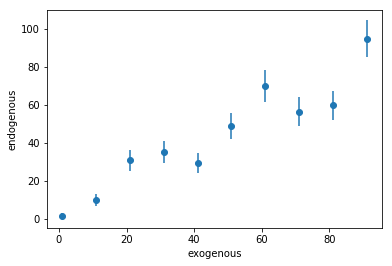

In [13]:
a=1
b=0
x = np.arange(1,100,10)
y = a*x + b + np.random.randn(len(x)) * errors(x)
pl.scatter(x,y)
pl.errorbar(x,y,yerr=np.sqrt(y),fmt='.')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

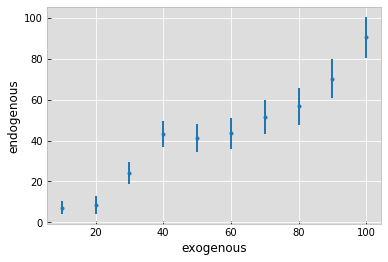

# print y, x, and the result of applying statsmodels.api.add_constant() to x

In [25]:
print(x)

[ 1 11 21 31 41 51 61 71 81 91]


In [26]:
print(y)

[  1.5661705    9.69336191  30.83487626  35.02302384  29.30812213
  48.81373115  69.77689236  56.43278477  59.75775666  94.86280426]


In [27]:
print(sm.add_constant(x))

[[  1.   1.]
 [  1.  11.]
 [  1.  21.]
 [  1.  31.]
 [  1.  41.]
 [  1.  51.]
 [  1.  61.]
 [  1.  71.]
 [  1.  81.]
 [  1.  91.]]


# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [28]:
#THE WRONG WAY
smfitw = smf.OLS(y, x).fit()
smfitw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     265.9
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           5.45e-08
Time:                        12:14:51   Log-Likelihood:                -36.437
No. Observations:                  10   AIC:                             74.87
Df Residuals:                       9   BIC:                             75.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9272      0.057     16.305      0.000         0.799     1.056
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.683
Skew:                          -0.303   Prob(JB):                        0.711
Kurtosis:                       1.872   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#THE RIGHT WAY
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     61.22
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           5.12e-05
Time:                        12:14:55   Log-Likelihood:                -36.243
No. Observations:                  10   AIC:                             76.49
Df Residuals:                       8   BIC:                             77.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.4092      6.057      0.563      0.589       -10.558    17.376
x1             0.8739      0.112      7.824      0.000         0.616     1.131
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.684
Skew:                          -0.001   Prob(JB):                        0.710
Kurtosis:                       1.719   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

In [30]:
smfitw.fittedvalues

array([  0.92718749,  10.19906244,  19.47093739,  28.74281234,
        38.01468728,  47.28656223,  56.55843718,  65.83031212,
        75.10218707,  84.37406202])

In [31]:
smfit.fittedvalues

array([  4.28302808,  13.02167793,  21.76032777,  30.49897762,
        39.23762746,  47.97627731,  56.71492715,  65.453577  ,
        74.19222684,  82.93087668])

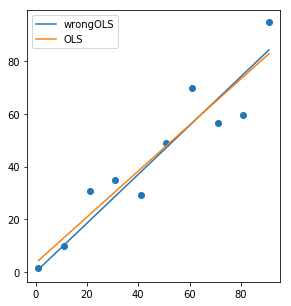

In [33]:
fig= figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
pl.scatter(x,y)
pl.plot(x,smfitw.fittedvalues,label='wrongOLS')
pl.plot(x,smfit.fittedvalues,label='OLS')
pl.legend()

# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

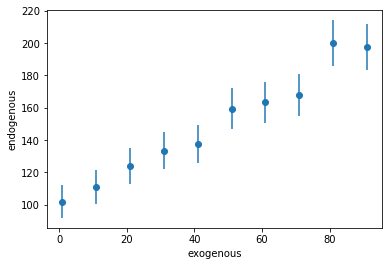

In [34]:
a=1
b=100
x = np.arange(1,100,10)
y = a*x + b + np.random.randn(len(x)) * errors(x)
pl.scatter(x,y)
pl.errorbar(x,y,yerr=np.sqrt(y),fmt='.')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

# repeat step 3

In [37]:
olsmodelwrong = sm.OLS(y,x).fit()
olsmodelwrong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     66.77
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           1.87e-05
Time:                        12:17:22   Log-Likelihood:                -53.842
No. Observations:                  10   AIC:                             109.7
Df Residuals:                       9   BIC:                             110.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.6484      0.324      8.171      0.000         1.915     3.382
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.607
Skew:                           0.044   Prob(JB):                        0.738
Kurtosis:                       1.796   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# repeat step 4

In [38]:
olsmodel = sm.OLS(y,sm.add_constant(x)).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     266.6
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           1.99e-07
Time:                        12:17:29   Log-Likelihood:                -31.184
No. Observations:                  10   AIC:                             66.37
Df Residuals:                       8   BIC:                             66.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         99.0241      3.652     27.113      0.000        90.602   107.446
x1             1.0996      0.067     16.327      0.000         0.944     1.255
==============================================================================
Omnibus:                        1.605   Durbin-Watson:                   2.929
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                0.307
Skew:                           0.423   Prob(JB):                        0.858
Kurtosis:                       3.145   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [42]:
yerr = np.sqrt(y)
wlsmodel = sm.WLS(endog=y,exog=x,weights = 1/yerr).fit()
wlsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.863
Model:                            WLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     56.56
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           3.61e-05
Time:                        12:24:16   Log-Likelihood:                -54.368
No. Observations:                  10   AIC:                             110.7
Df Residuals:                       9   BIC:                             111.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.6913      0.358      7.520      0.000         1.882     3.501
==============================================================================
Omnibus:                        0.872   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.624
Skew:                           0.171   Prob(JB):                        0.732
Kurtosis:                       1.825   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.75e-06
Time:                        12:14:01   Log-Likelihood:                -29.722
No. Observations:                  10   AIC:                             63.44
Df Residuals:                       8   BIC:                             64.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5287      2.356     30.781      0.000      67.095      77.962
x1             0.6314      0.054     11.612      0.000       0.506       0.757
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.720
Skew:                           0.203   Prob(JB):                        0.698
Kurtosis:                       1.750   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

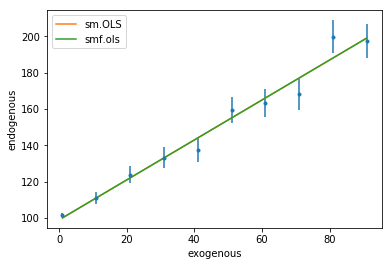

In [41]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
smfitDoneRight = sm.OLS(y,sm.add_constant(x)).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

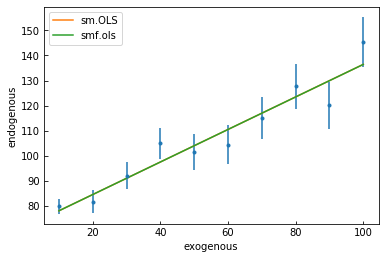

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();